In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import sidetable
import re 

import warnings
warnings.filterwarnings('ignore')

In [91]:
plt.style.use(['ggplot'])

In [92]:
plt.rcParams["figure.figsize"]=(10,5)

plt.rcParams['figure.edgecolor']=('black')
sns.set(font = "serif")

palette = "hls"
sns.set_style("whitegrid")
style = "clean.mplstyle"

In [93]:
style_list = ['default', 'classic'] + sorted(
    style for style in plt.style.available
    if style != 'classic' and not style.startswith('_'))

In [94]:
df= pd.read_pickle("../data/data_final.pickle") #Abrimos el dataframe

In [95]:
df.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa,lista_nubes,lenguaje_lista
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,"Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999,Salario muy bajo,NO,"[ GitHub , Kaggle ]","[Python, R]"
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,"SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",unknown,NaN,69999,Salario muy bajo,NO,[unknown],"[ SQL, C, C++, Java]"


In [96]:
df.shape

(25973, 26)

In [97]:
df.dtypes

level_0                     int64
index                       int64
time                        int64
age                        object
gender                     object
pais                       object
formacion                  object
puesto                     object
experiencia_prog           object
lenguaje_top               object
exp_ml                     object
tamaño_empresa             object
uso_ml                     object
salario                    object
inversion_ml               object
ppal_herramienta_data      object
lenguaje_prog              object
plataforma                 object
plat_cursos                object
nubes                      object
plataforma_top             object
salario_max                 Int64
rango_salario            category
europa                     object
lista_nubes                object
lenguaje_lista             object
dtype: object

In [98]:
df['lenguaje_top'].unique()

array(['Python', 'SQL', 'R', 'MATLAB', 'C', 'Julia', nan, 'Other', 'C++',
       'Javascript', 'Java', 'None', 'Bash', 'Swift'], dtype=object)

#### Vamos a ir recorriendo cada una de las preguntas y llamando a los diferentes funciones creadas, generandon los dataframes ajustados para poder responder y sacar conclusiones de la mejor manera

### - ¿Cual es la diferencia en numero de contrataciones segun genero para cada puesto? (posibilidad nivel mundial)
- Columnas que toca:
        - 'gender'= no tiene nulos asique esta lista, verificar unique para descartar que no tenga cosas raras.
        - 'puesto' = tampoco tiene nulos, ver uniques y ver si recategorizamos por menos cantidades.


In [99]:
df['puesto'].unique()# Verificamos valores unicos de la columna puesto 

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Currently not employed', 'Student',
       'Data Scientist', 'Data Analyst', 'Machine Learning Engineer',
       'Business Analyst', 'Data Engineer', 'Product Manager',
       'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

In [100]:
df['puesto'].value_counts()# hacemos un conteo de los mismos

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

Para nuestra pregunta vamos a creamos un nuevo dataframe que no contemple como puesto las categorias 'Student', 'Other' y 'Currently not employed'

In [101]:
df_puesto_genero= df[ ~df['puesto'].isin(['Student','Other', 'Currently not employed'])] 

In [102]:
df_puesto_genero.shape

(14790, 26)

In [103]:
df_puesto_genero['puesto'].unique()

array(['Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Business Analyst', 'Data Engineer',
       'Product Manager', 'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

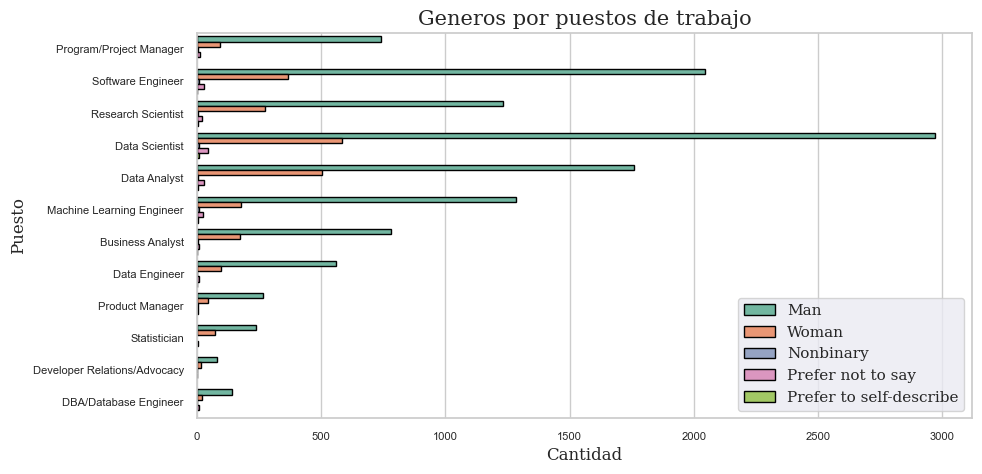

In [104]:
plt.figure()

fig = sns.countplot(data = df_puesto_genero, y = "puesto", palette = "Set2", hue = "gender", edgecolor = "black")
fig.set(xlabel = "Cantidad", ylabel = "Puesto")

sns.set_style("whitegrid")
sns.set(font = "serif")

plt.legend(loc= 'lower right')
#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(bbox_to_anchor = (0.7, 0.7))
plt.title(label='Generos por puestos de trabajo',font = "serif", fontsize= 15, position=(0.5,6))


#plt.set_title(loc="left",x=0.05,y=0.9,transform=fig.transFigure)


plt.xlabel("Cantidad", fontsize = 10, font = "serif")
plt.ylabel("Puesto", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.savefig('graficas/generos_por_puesto_de_trabajo.jpeg',bbox_inches='tight');

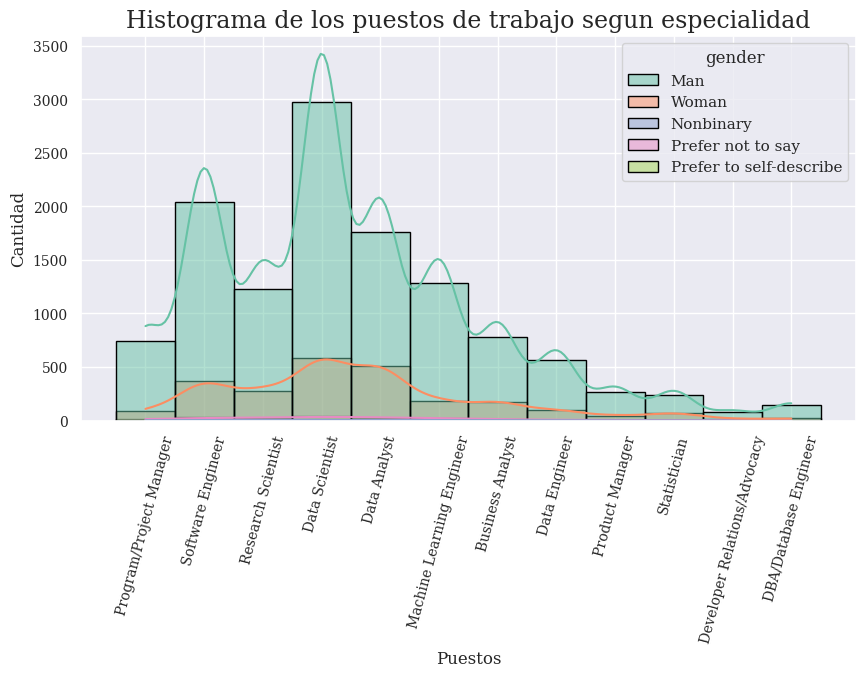

In [105]:
plt.figure()

fig = sns.histplot(x='puesto', data = df_puesto_genero, palette = "Set2", hue = 'gender', edgecolor = "black",kde=True)

plt.title('Histograma de los puestos de trabajo segun especialidad',font = "serif", fontsize= 17, position=(0.5,6))

plt.xticks(rotation= 75)

plt.xlabel("Puestos", fontsize = 12)
plt.ylabel("Cantidad", fontsize = 12)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.savefig('graficas/histograma_puestos_especialidad.jpeg',bbox_inches='tight');

plt.show()

### Conclusiones:

#### podriamos hacer un grafico de porcentajes por cada puesto con los porcentajes segun genero no se me ocurre como

---

### - ¿Cual es perfil educativo para cada puesto? (Europa)
- Columnas que toca:
    - puesto = no tiene nulos ver si categorizamos mejor o si nos enfocamos en uno en particular.
    - formacion= no tiene nulos, ver que hacer con studens o los que no respondieron.
Ver si damos vuelta de rosca y lo profundizamos mas para mujeres y un pais o continente especifico!

In [106]:
df.head()

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa,lista_nubes,lenguaje_lista
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,"Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999,Salario muy bajo,NO,"[ GitHub , Kaggle ]","[Python, R]"
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,"SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",unknown,NaN,69999,Salario muy bajo,NO,[unknown],"[ SQL, C, C++, Java]"
2,2,2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,...,"Python, C++, Java","PyCharm ,Jupyter Notebook, Other",DataCamp,I do not share my work publicly,NaN,999,Salario muy bajo,NO,[I do not share my work publicly],"[Python, C++, Java]"
3,3,3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,...,Python,"Spyder,Jupyter Notebook",edX,unknown,NaN,39999,Salario muy bajo,NO,[unknown],[Python]
4,4,4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,...,"Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Kaggle Learn Courses,Udemy",I do not share my work publicly,NaN,39999,Salario muy bajo,NO,[I do not share my work publicly],"[Python, C, MATLAB]"


In [107]:
df_europa_puestos=df_puesto_genero[ df_puesto_genero['europa'] == 'SI'] #FILTRAMOS DESDE EL DF QUE NO TIENE EN CUENTA 'Student','Other', 'Currently not employed'

---

### GENERO POR PUESTO  EUROPA

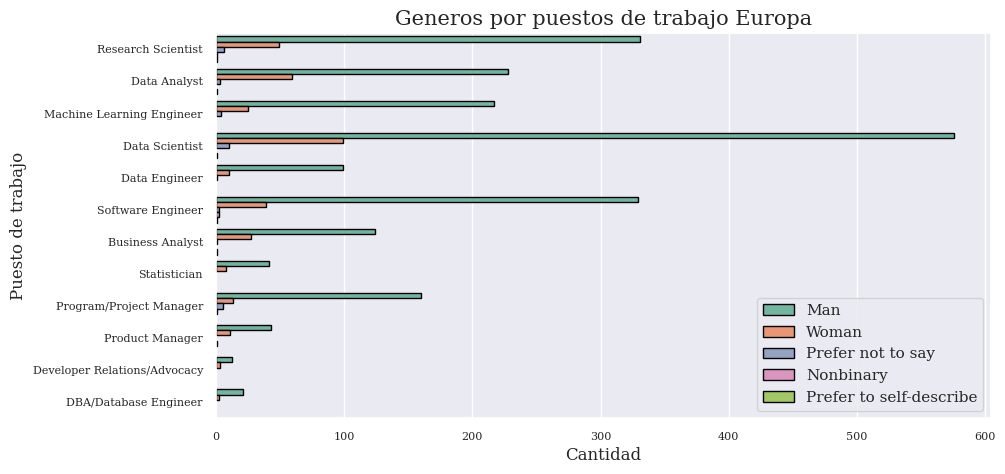

In [108]:
plt.figure()

fig = sns.countplot(data = df_europa_puestos, y = "puesto", palette = "Set2", hue = "gender", edgecolor = "black")


sns.set_style("whitegrid")
sns.set(font = "serif")

plt.legend(loc= 'lower right')
#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(bbox_to_anchor = (0.7, 0.7))
plt.title(label='Generos por puestos de trabajo Europa',font = "serif", fontsize= 15, position=(0.5,6))


#plt.set_title(loc="left",x=0.05,y=0.9,transform=fig.transFigure)


plt.xlabel("Cantidad", fontsize = 10, font = "serif")
plt.ylabel("Puesto de trabajo", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.savefig('graficas/generos_por_puesto_de_trabajo_europa.jpeg',bbox_inches='tight');

In [109]:
df_europa_puestos.shape

(2568, 26)

In [110]:
df_europa_puestos['pais'].unique() #VER QUE HACEMOS CON RUSSIA

array(['Greece', 'Belgium', 'Poland', 'Russia', 'France', 'Italy',
       'Sweden', 'Spain', 'Austria', 'Ireland', 'Ukraine', 'Denmark',
       'Germany', 'Portugal', 'Netherlands', 'Romania', 'Switzerland',
       'Norway', 'Belarus', 'Czech Republic'], dtype=object)

In [111]:
df_europa_puestos['pais'].value_counts()

Russia            510
Spain             314
Germany           304
France            273
Italy             214
Poland            163
Ukraine           128
Netherlands       108
Portugal           77
Greece             70
Sweden             54
Ireland            49
Romania            47
Czech Republic     47
Switzerland        43
Belgium            39
Denmark            36
Austria            35
Belarus            34
Norway             23
Name: pais, dtype: int64

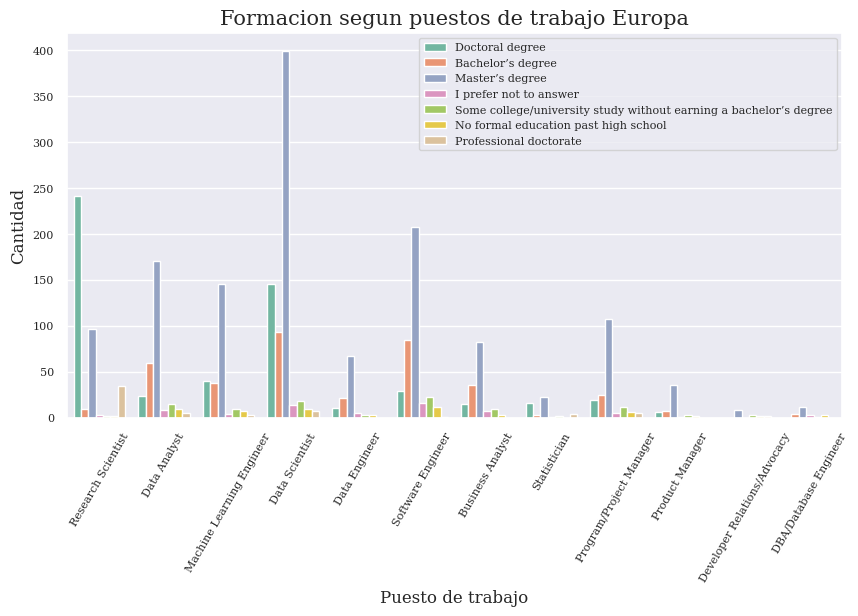

In [112]:
plt.figure( )

fig = sns.countplot(x = 'puesto', data = df_europa_puestos, palette = "Set2", hue= 'formacion')



sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title(label='Formacion segun puestos de trabajo Europa',font = "serif", fontsize= 15, position=(0.5,6))

#plt.legend(bbox_to_anchor = (0.7, 0.7)) 

plt.legend(loc= 'upper right', fontsize= 8)

plt.xlabel("Puesto de trabajo", fontsize = 10, font = "serif")
plt.ylabel("Cantidad", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xticks(rotation = 60)


plt.savefig('graficas/formacion_segun_puesto_europa.jpeg',bbox_inches='tight')
plt.show()


Vamos a analizar el perfil educativo pero solo para el perfil de 'Data Scientist'

In [113]:
df_europa_puestos.puesto.unique()

array(['Research Scientist', 'Data Analyst', 'Machine Learning Engineer',
       'Data Scientist', 'Data Engineer', 'Software Engineer',
       'Business Analyst', 'Statistician', 'Program/Project Manager',
       'Product Manager', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

### DATA SCIENTIST

In [114]:
df_europa_puesto_data=df_puesto_genero[ df_puesto_genero['puesto'] == 'Data Scientist']

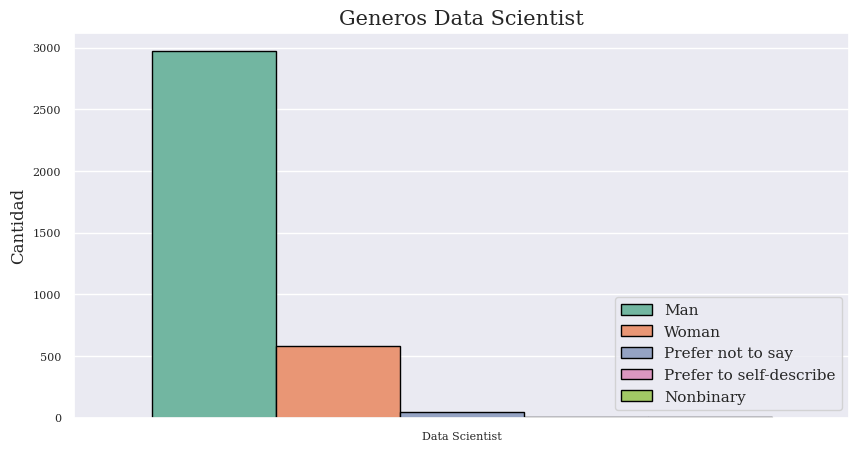

In [115]:
plt.figure()

fig = sns.countplot(data = df_europa_puesto_data, x = "puesto", palette = "Set2", hue = "gender", edgecolor = "black")
fig.set(xlabel = "Genero", ylabel = "Cantidad")

sns.set_style("whitegrid")
sns.set(font = "serif")

plt.legend(loc= 'lower right')
#plt.legend(bbox_to_anchor=(1.05, 1))

#plt.legend(bbox_to_anchor = (0.7, 0.7))
plt.title(label='Generos Data Scientist',font = "serif", fontsize= 15, position=(0.5,6))


#plt.set_title(loc="left",x=0.05,y=0.9,transform=fig.transFigure)


plt.xlabel("", fontsize = 10, font = "serif")
plt.ylabel("Cantidad", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.savefig('graficas/generos_datascientist.png',bbox_inches='tight');

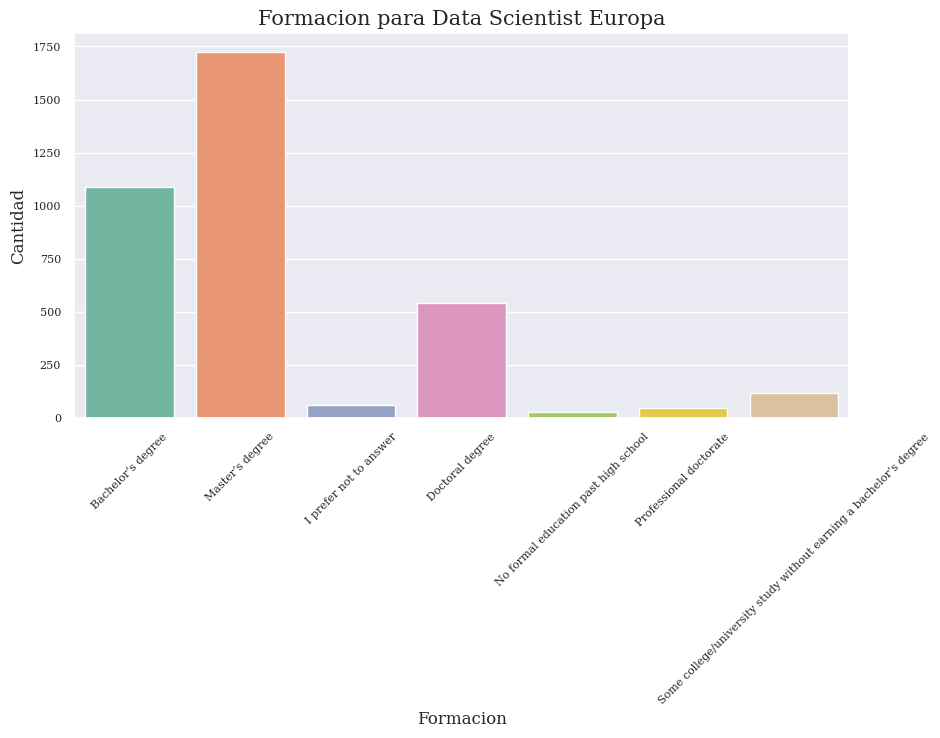

In [116]:
plt.figure( )

fig = sns.countplot(x = 'formacion', data = df_europa_puesto_data, palette = "Set2")


sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title(label='Formacion para Data Scientist Europa',font = "serif", fontsize= 15, position=(0.5,6))

plt.xlabel("Formacion", fontsize = 10, font = "serif")
plt.ylabel("Cantidad", fontsize = 10, font = "serif")


plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xticks(rotation = 45)

plt.savefig('graficas/formacion_data_scientist_europa.jpeg',bbox_inches='tight');

plt.show()

---

### - Herramientas mas utilizadas segun los perfiles. (leguaje_prog y plataforma)(Europa)
- Columnas que toca:
    - ppal_herramienta_data: tiene muchos muchos nulos, ver si podemos aplicar alguno de los metodos de imputer para solucionarlo o en el caso que lo sesgemos solo para un area especifica volver a verificar nulos ahi.
    - puesto = no tiene nulos, ver lo de la recategorizacion
Me parece interesante poder mezclar esta pregunta con otras dos columnas mas como son lenguaje_prog y plataforma para poder tener el combo de todo lo que se usa en ese area.

---

### - ¿Cuál es la diferencia de salarios entre hombres y mujeres segun el perfil? 
- Columnas que toca:
    - gender: no tiene nulos
    - salarios : poder hacer analisis de numeros con medias y demas segun genero.. verificar que cantidad de datos de hombre y mujer hay en el dataframe para jugar un poco con la poderacion.

In [117]:
from sklearn.impute import SimpleImputer

In [118]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)# Reemplazamos nulos por mediana

In [119]:
imputer = imputer.fit(df[['salario_max']])

In [120]:
df['salario_max_imputer'] = imputer.transform(df[['salario_max']])

In [121]:
df_europa_salarios= df[ df['europa'] == 'SI']# filtramos a Europa desde el df total.

In [122]:
df_europa_salarios.shape

(3777, 27)

In [123]:
df_europa_salarios['salario_max'].unique()

<IntegerArray>
[   <NA>,   14999,    2999,   29999,   39999,     999,    3999,   49999,
   59999,  149999,   69999,   19999,   79999,  124999,   24999,    4999,
    1999,   99999,   89999, 1000000,    9999,    7499,  249999,  199999,
  999999,  299999,  499999]
Length: 27, dtype: Int64

### VAmos a obtener la grafica que compara los salarios con el puesto de trabajo.. trabajamos con el df de europa que no tiene en cuenta ni estudiantes ni desempleados.

In [124]:
df_puesto_genero_europa= df_europa_salarios[ ~df_europa_salarios['puesto'].isin(['Student','Other', 'Currently not employed'])] 

(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

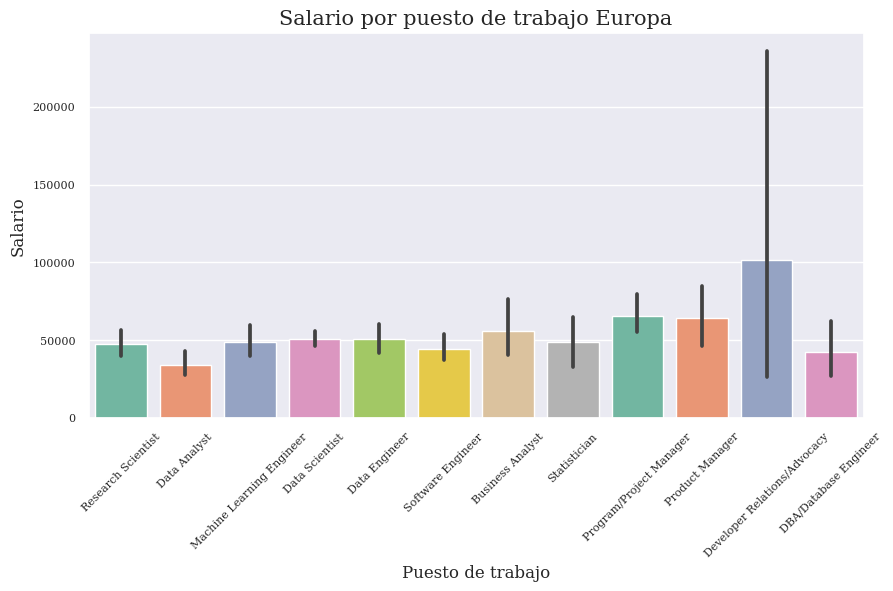

In [125]:
plt.figure()

fig = sns.barplot(x='puesto',y='salario_max_imputer', palette = "Set2",data= df_puesto_genero_europa)# Media de salarios por genero en paises de europa


sns.set_style("whitegrid")
sns.set(font = "serif")


plt.title(label='Salario por puesto de trabajo Europa',font = "serif", fontsize= 15, position=(0.5,6))


#plt.set_title(loc="left",x=0.05,y=0.9,transform=fig.transFigure)

plt.xticks(rotation = 45)

plt.xlabel("Puesto de trabajo", fontsize = 10, font = "serif")
plt.ylabel("Salario", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

#plt.savefig('graficas/salario_puesto_europa.png',bbox_inches='tight');

---

### Analizamos  para DataScientist

In [126]:
df_europa_salarios_data= df_europa_salarios[ df_europa_salarios['puesto'] == 'Data Scientist']

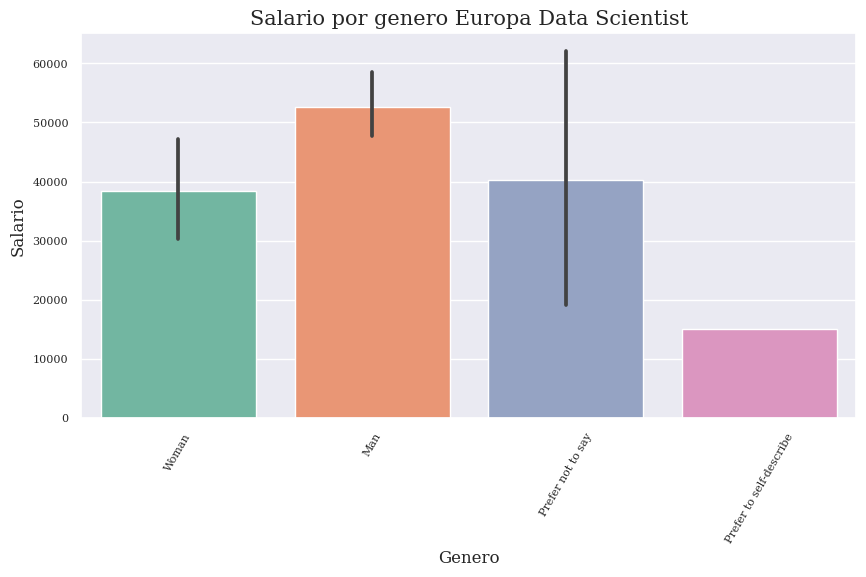

In [127]:
plt.figure( )

fig = sns.barplot(x='gender',y='salario_max_imputer', palette = "Set2",data= df_europa_salarios_data)



sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title(label='Salario por genero Europa Data Scientist',font = "serif", fontsize= 15, position=(0.5,6))


plt.xlabel("Genero", fontsize = 10, font = "serif")
plt.ylabel("Salario", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xticks(rotation = 60)


plt.savefig('graficas/salario_por_genero_eu_datascientis.jpeg',bbox_inches='tight')
plt.show()

In [128]:
df_europa_salarios.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top', 'salario_max', 'rango_salario', 'europa',
       'lista_nubes', 'lenguaje_lista', 'salario_max_imputer'],
      dtype='object')

In [129]:
df_europa_salarios.stb.missing()

,missing,total,percent
plataforma_top,3364,3777,89.065396
inversion_ml,1131,3777,29.944400
salario,1101,3777,29.150119
rango_salario,1101,3777,29.150119
salario_max,1101,3777,29.150119
uso_ml,998,3777,26.423087
tamaño_empresa,963,3777,25.496426
plat_cursos,920,3777,24.357956
ppal_herramienta_data,829,3777,21.948636
exp_ml,193,3777,5.109876


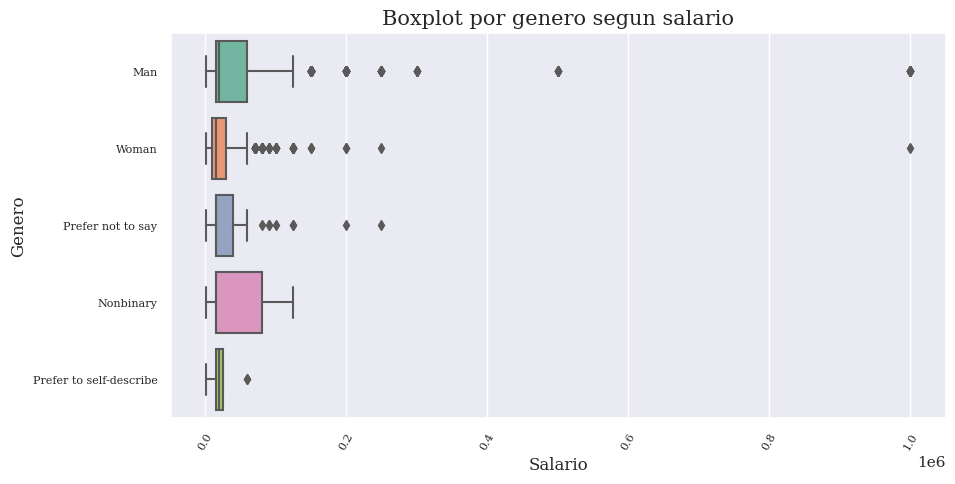

In [130]:
plt.figure( )

fig = sns.boxplot(x = 'salario_max_imputer', y='gender',  palette = "Set2",   data = df_europa_salarios)



sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title(label='Boxplot por genero segun salario',font = "serif", fontsize= 15, position=(0.5,6))


plt.xlabel("Salario", fontsize = 10, font = "serif")
plt.ylabel("Genero", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xticks(rotation = 60)


#plt.savefig('graficas/Boxplot_genero_salario_europa.jpeg',bbox_inches='tight')
plt.show()

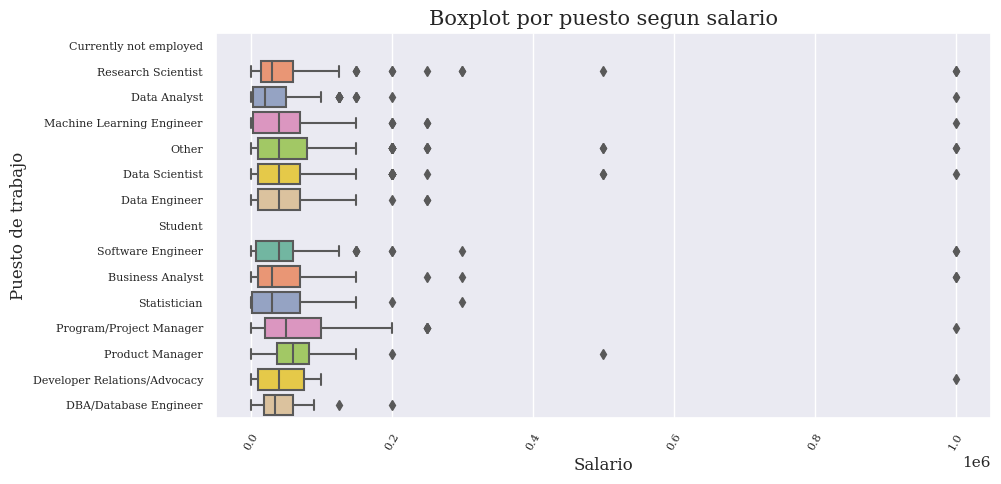

In [131]:
plt.figure( )

fig = sns.boxplot(x = 'salario_max', y='puesto',  palette = "Set2",   data = df_europa_salarios)



sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title(label='Boxplot por puesto segun salario',font = "serif", fontsize= 15, position=(0.5,6))


plt.xlabel("Salario", fontsize = 10, font = "serif")
plt.ylabel("Puesto de trabajo", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xticks(rotation = 60)


#plt.savefig('graficas/Boxplot_salario_puesto_europa.jpeg',bbox_inches='tight')
plt.show()

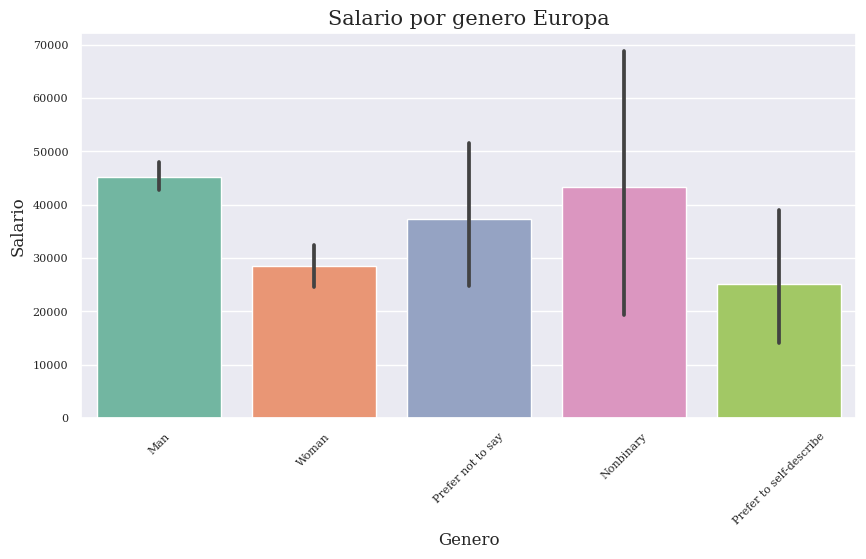

In [132]:
plt.figure( )

fig = sns.barplot(x = 'gender', y= 'salario_max_imputer',data = df_europa_salarios, palette = "Set2")



sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title(label='Salario por genero Europa',font = "serif", fontsize= 15, position=(0.5,6))


plt.xlabel("Genero", fontsize = 10, font = "serif")
plt.ylabel("Salario", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xticks(rotation = 45)


plt.savefig('graficas/salario_por_genero_europa_imputer.jpeg',bbox_inches='tight')
plt.show()

Vamos a separar los outliers para poder analizar correctamente las comparaciones con salarios.

In [133]:
def detectar_outliers(columna, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    #for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
    Q1 = np.nanpercentile(dataframe[columna], 25)
    Q3 = np.nanpercentile(dataframe[columna], 75)
        
        # calculamos el rango intercuartil
    IQR = Q3 - Q1
        
        # calculamos los límites
    outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
    outliers_data = dataframe[(dataframe[columna] < Q1 - outlier_step) | (dataframe[columna] > Q3 + outlier_step)]
        
        
    if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
        dicc_indices[columna] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [134]:
indices = detectar_outliers('salario_max_imputer', df_europa_salarios)

In [135]:
valores =indices.values()


In [136]:
for i in valores:
    valores = i

In [137]:
# nos hacemos una copia del dataframe original

df_outliers = df.copy()

In [138]:
# eliminamos usando la lista de índices las filas que hemos identificado como outliers

df_total_sin_outliers = df_outliers.drop(df_outliers.index[list(valores)])

como los outliers de la columna salario_max_imputer los eliminamos de una copia del dataframe original por los numero de indice, tenemos que volver a hacer todos los filtros para llegar a tener de nuevo solo europa.

In [139]:
df_total_sin_outliers.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa,lista_nubes,lenguaje_lista,salario_max_imputer
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999,Salario muy bajo,NO,"[ GitHub , Kaggle ]","[Python, R]",29999.0
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,"Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",unknown,NaN,69999,Salario muy bajo,NO,[unknown],"[ SQL, C, C++, Java]",69999.0


In [140]:
df_europa_salario_sinoutliers= df_total_sin_outliers[ df_total_sin_outliers['europa'] == 'SI']

VOLVEMOS A HACER LAS GRAFICAS PARA VER LOS CAMBIOS!

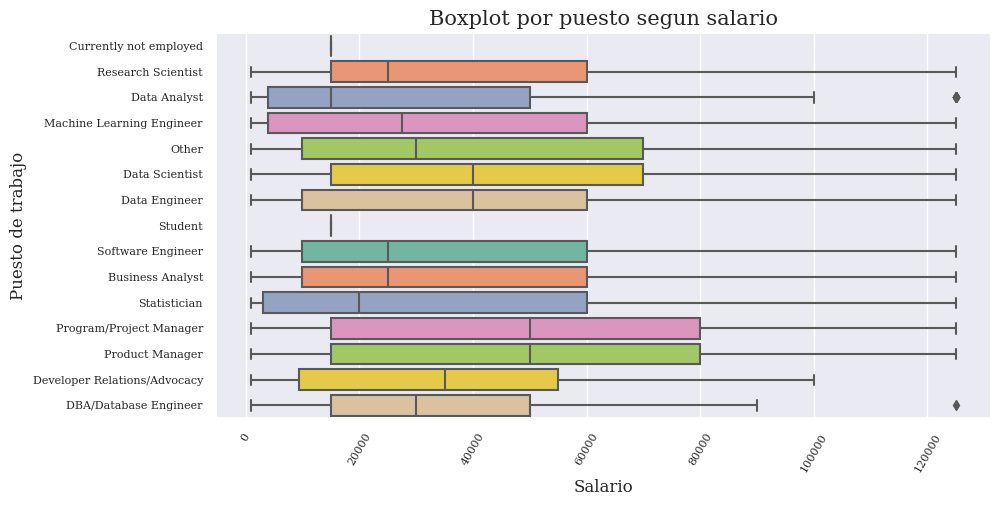

In [141]:
plt.figure( )

fig = sns.boxplot(x = 'salario_max_imputer', y='puesto',  palette = "Set2",   data = df_europa_salario_sinoutliers)



sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title(label='Boxplot por puesto segun salario',font = "serif", fontsize= 15, position=(0.5,6))


plt.xlabel("Salario", fontsize = 10, font = "serif")
plt.ylabel("Puesto de trabajo", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xticks(rotation = 60)


plt.savefig('graficas/Boxplot_salario_puesto_europa.jpeg',bbox_inches='tight')
plt.show()

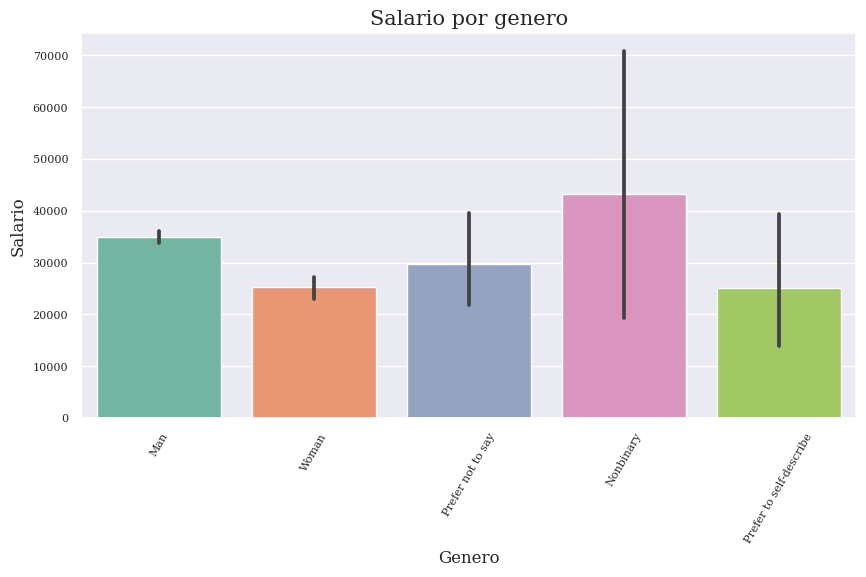

In [142]:
plt.figure( )

fig = sns.barplot(x='gender',y='salario_max_imputer',  palette = "Set2",data= df_europa_salario_sinoutliers)



sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title(label='Salario por genero',font = "serif", fontsize= 15, position=(0.5,6))


plt.xlabel("Genero", fontsize = 10, font = "serif")
plt.ylabel("Salario", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xticks(rotation = 60)


plt.savefig('graficas/salario_genero_europa_sinout.jpeg',bbox_inches='tight')
plt.show()

### VEMOS PARA DATA SCIENT

In [143]:
df_europa_salarios_data2= df_europa_salario_sinoutliers[ df_europa_salario_sinoutliers['puesto'] == 'Data Scientist']

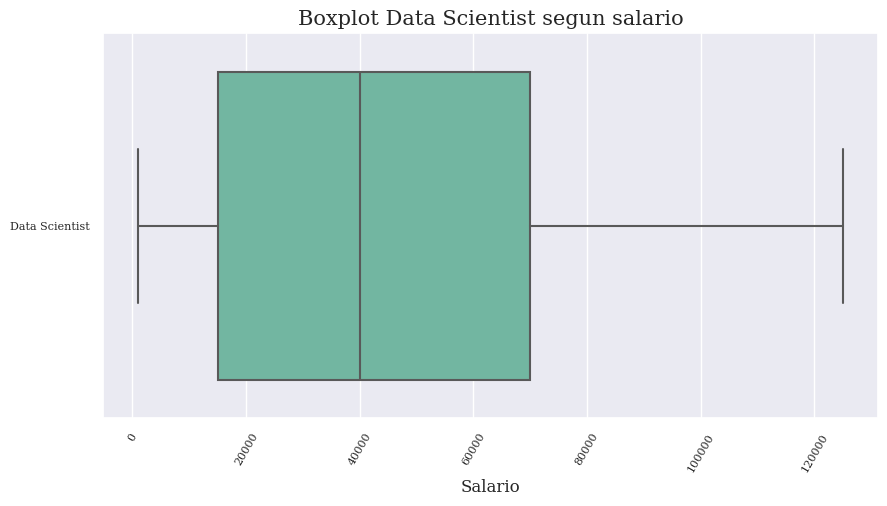

In [144]:
plt.figure( )

fig = sns.boxplot(x = 'salario_max_imputer', y='puesto',  palette = "Set2",   data = df_europa_salarios_data2)



sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title(label='Boxplot Data Scientist segun salario',font = "serif", fontsize= 15, position=(0.5,6))


plt.xlabel("Salario", fontsize = 10, font = "serif")
plt.ylabel( '',fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xticks(rotation = 60)


plt.savefig('graficas/Boxplot_salario_datascientist_europa.jpeg',bbox_inches='tight')
plt.show()

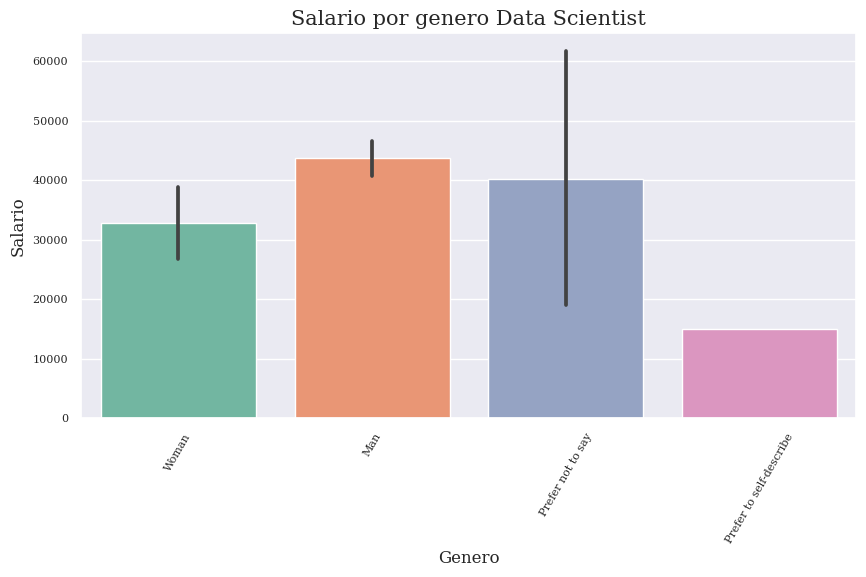

In [145]:
plt.figure( )

fig = sns.barplot(x='gender',y='salario_max_imputer',  palette = "Set2",data= df_europa_salarios_data2)



sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title(label='Salario por genero Data Scientist',font = "serif", fontsize= 15, position=(0.5,6))


plt.xlabel("Genero", fontsize = 10, font = "serif")
plt.ylabel("Salario", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xticks(rotation = 60)


plt.savefig('graficas/salario_genero_europa_datascientist.jpeg',bbox_inches='tight')
plt.show()

---

In [146]:
#import plotly.express as px # VER DE GESTIONAR LOS OUTLAIERS
#import pandas as pd


           
#fig = px.line_polar(df_europa_salarios, r = 'salario_max_imputer', theta = 'puesto', line_close = True)

#fig.show()

### - Perfil segun pais que herramientas usan, en coparativa con España.
- Columnas que toca:
    -pais: no tiene nulos, los vamos a fraccionar y analizar solo algunos?
    -herramientas de trabajo tenemos que alinearlo con  loque hagamos con los paises y demas preguntas.
Extras:
- ¿Cómo se distribuye este porcentaje segun los paises?

In [147]:
df_europa= df[ df['europa'] == 'SI']

In [148]:
df_europa.shape

(3777, 27)

In [149]:
df_europa.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top', 'salario_max', 'rango_salario', 'europa',
       'lista_nubes', 'lenguaje_lista', 'salario_max_imputer'],
      dtype='object')

### COLUMNA LENGUAJES PROG

In [150]:
df_explode_lenguaje =df_europa.explode('lenguaje_lista')

In [171]:
df_group_lenguajes =pd.DataFrame(df_explode_lenguaje.groupby('lenguaje_lista')['lenguaje_lista'].count())
df_group_lenguajes

,lenguaje_lista
lenguaje_lista,
Bash,570
C,407
C++,628
Java,518
Javascript,523
Julia,67
MATLAB,373
None,47
Other,531


In [152]:
df_group_lenguajes.rename(columns={'lenguaje_lista':'conteo_eleccion'}, inplace= True)

In [153]:
df_group_lenguajes.reset_index(inplace=True)

In [154]:
def porcentajes (x):
    return round((x/df_europa.shape[0])*100, 2)

In [155]:
df_group_lenguajes['porcentaje']= df_group_lenguajes['conteo_eleccion'].apply(porcentajes)
df_group_lenguajes

,lenguaje_lista,conteo_eleccion,porcentaje
0,Bash,570,15.09
1,C,407,10.78
2,C++,628,16.63
3,Java,518,13.71
4,Javascript,523,13.85
5,Julia,67,1.77
6,MATLAB,373,9.88
7,None,47,1.24
8,Other,531,14.06
9,R,824,21.82


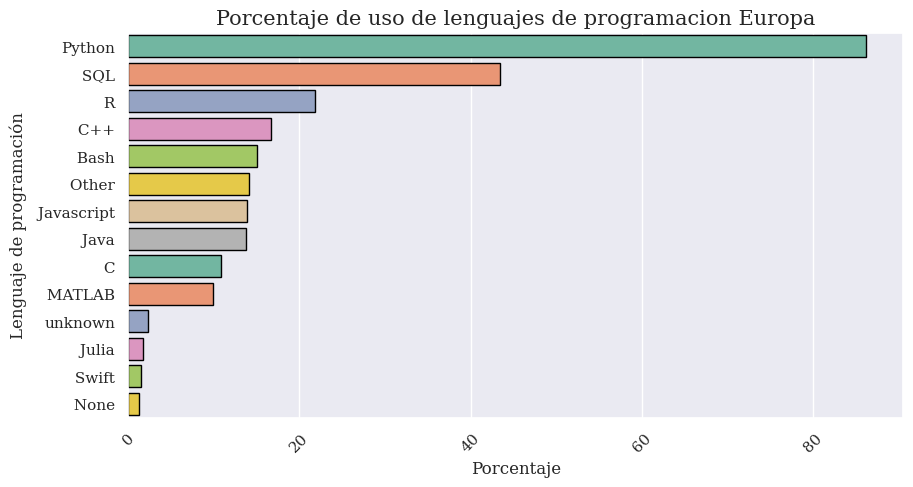

In [157]:
plt.figure()


ordenado =df_group_lenguajes.sort_values("porcentaje", ascending=False)
fig = sns.barplot(x = 'porcentaje', y= 'lenguaje_lista', data = ordenado, edgecolor = 'black', palette='Set2')

sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title('Porcentaje de uso de lenguajes de programacion Europa',fontsize= 15, position=(0.5,6))
plt.xticks(rotation = 45)

plt.xlabel("Porcentaje", fontsize = 10, font = "serif")
plt.ylabel("Lenguaje de programación", fontsize = 10, font = "serif")

plt.savefig('graficas/uso_lenguajes_europa.jpeg',bbox_inches='tight')

plt.show(); 

---

Vamos a sacar herramientas mas utilizadas por perfil

In [181]:
df_explode_lenguaje.shape

(9527, 27)

In [184]:
df_explode_leng= df_explode_lenguaje[ ~df_explode_lenguaje['puesto'].isin(['Student','Other', 'Currently not employed'])] 


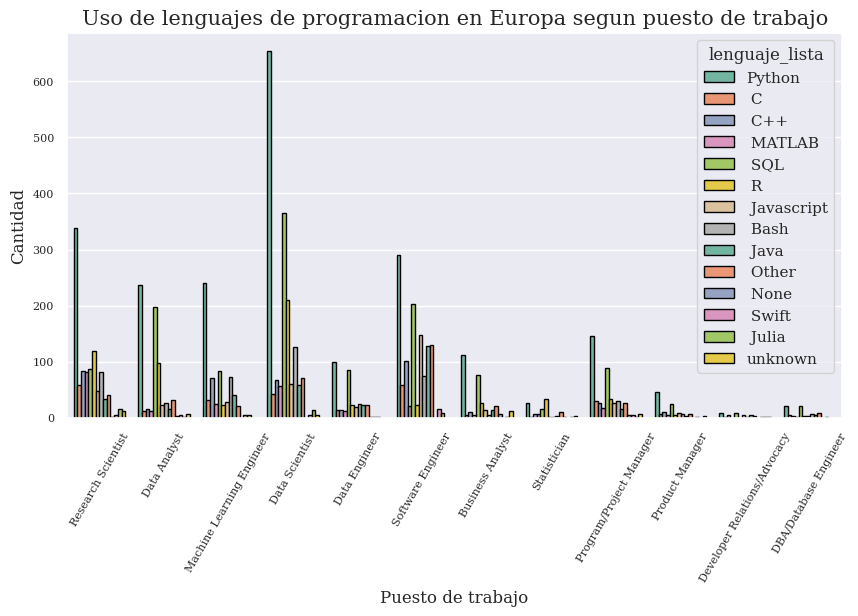

In [236]:
plt.figure()


#ordenado =df_explode_leng.sort_values("porcentaje", ascending=False)
fig = sns.countplot( x= 'puesto', hue='lenguaje_lista', data = df_explode_leng, edgecolor = 'black', palette='Set2')

sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title('Uso de lenguajes de programacion en Europa segun puesto de trabajo',fontsize= 15, position=(0.5,6))
plt.xticks(rotation = 60)

plt.xlabel("Puesto de trabajo", fontsize = 10, font = "serif")
plt.ylabel("Cantidad", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.savefig('graficas/uso_lenguajes_europa_puesto.png',bbox_inches='tight')

plt.show(); 

### COLUMNA NUBES

In [158]:
df_europa.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa,lista_nubes,lenguaje_lista,salario_max_imputer
8,8,8,1744,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years,Python,...,Other,Kaggle Learn Courses,unknown,NaN,<NA>,NaN,SI,[unknown],"[Python, SQL]",14999.0
15,15,15,563,35-39,Man,Greece,Doctoral degree,Research Scientist,10-20 years,Python,...,Spyder,"Udacity,University Courses (resulting in a uni...",unknown,NaN,14999,Salario muy bajo,SI,[unknown],"[Python, C, C++, MATLAB]",14999.0


In [220]:
df_explode_nubes =df_europa.explode('lista_nubes')
df_explode_nubes['lista_nubes'].unique()

array(['unknown', 'I do not share my work publicly', ' GitHub ',
       ' Personal blog ', ' Shiny ', ' Streamlit ', ' Kaggle ', ' Colab ',
       ' NBViewer ', 'Other'], dtype=object)

In [221]:
df_explode_nub= df_explode_nubes[ ~df_explode_nubes['lista_nubes'].isin(['unknown','I do not share my work publicly'])]

In [222]:
df_group_nubes =pd.DataFrame(df_explode_nub.groupby('lista_nubes')['lista_nubes'].count())
df_group_nubes

,lista_nubes
lista_nubes,
Colab,282
GitHub,753
Kaggle,443
NBViewer,25
Personal blog,94
Shiny,65
Streamlit,73
Other,70


In [223]:
df_group_nubes.rename(columns={'lista_nubes':'conteo_eleccion' }, inplace= True)

In [224]:
df_group_nubes.reset_index(inplace=True)

In [ ]:
def porcentajes (x):
    return round((x/df_europa.shape[0])*100, 2)

In [225]:
df_group_nubes['porcentaje']= df_group_nubes['conteo_eleccion'].apply(porcentajes)
df_group_nubes

,lista_nubes,conteo_eleccion,porcentaje
0,Colab,282,7.47
1,GitHub,753,19.94
2,Kaggle,443,11.73
3,NBViewer,25,0.66
4,Personal blog,94,2.49
5,Shiny,65,1.72
6,Streamlit,73,1.93
7,Other,70,1.85


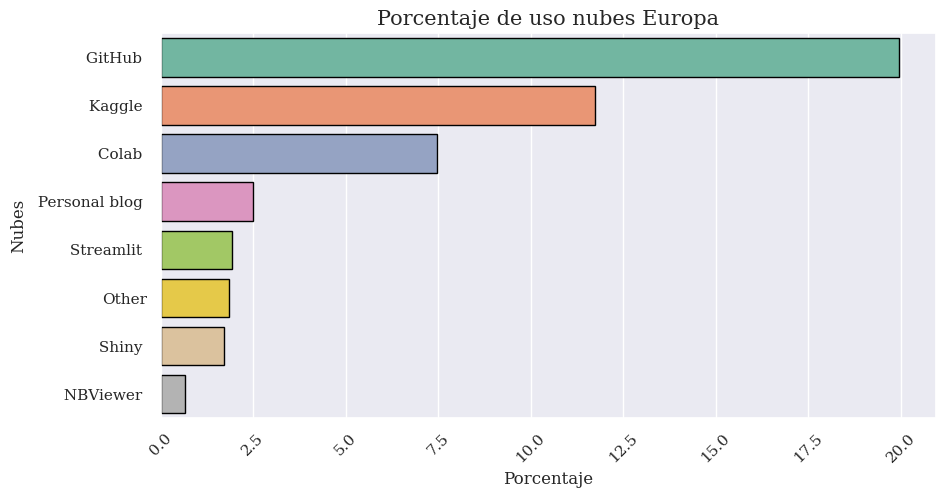

In [226]:
plt.figure( )

ordenado =df_group_nubes.sort_values("porcentaje", ascending=False)
fig = sns.barplot(x = 'porcentaje', y= 'lista_nubes', data = ordenado, edgecolor = 'black',  palette = "Set2")

sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title('Porcentaje de uso nubes Europa',fontsize= 15, position=(0.5,6))
plt.xticks(rotation = 45)


plt.xlabel("Porcentaje", fontsize = 10, font = "serif")
plt.ylabel("Nubes", fontsize = 10, font = "serif")

plt.savefig('graficas/uso_nubes_europa.jpeg',bbox_inches='tight')

plt.show(); 

In [227]:
df_nubes= df_explode_nub[ ~df_explode_nub['puesto'].isin(['Student','Other', 'Currently not employed'])] 

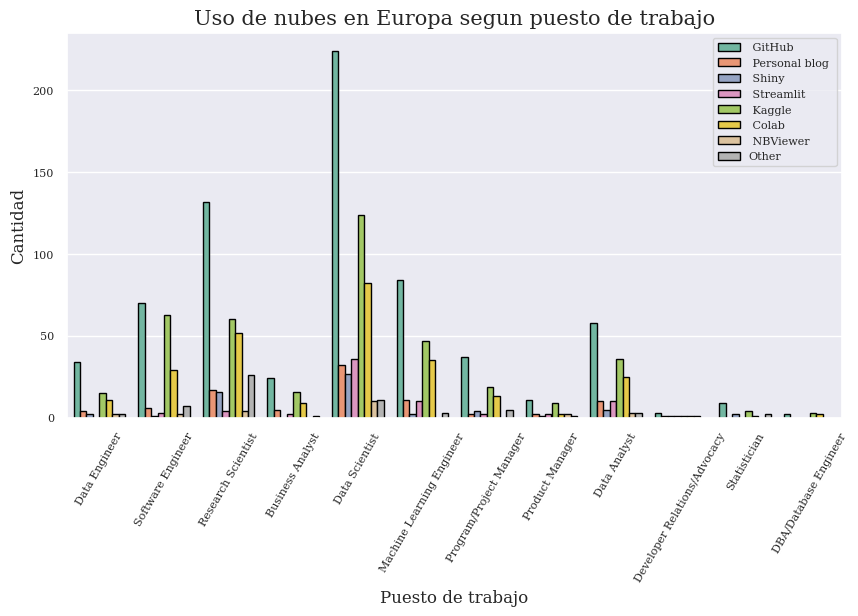

In [238]:
plt.figure()


#ordenado =df_explode_leng.sort_values("porcentaje", ascending=False)
fig = sns.countplot( x= 'puesto', hue='lista_nubes', data = df_nubes, edgecolor = 'black', palette='Set2')

sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title('Uso de nubes en Europa segun puesto de trabajo',fontsize= 15, position=(0.5,6))
plt.xticks(rotation = 60)

plt.xlabel("Puesto de trabajo", fontsize = 10, font = "serif")
plt.ylabel("Cantidad", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.legend(loc= 'upper right', fontsize= 8)

plt.savefig('graficas/uso_nubes_europa_puesto.png',bbox_inches='tight')

plt.show(); 

POR LOGRAR:

Deberiamos poder realizar estos cambios en el archivo 'sprint_review_3_clen, asi los traemos arrastrados a este archivo ya listos para solo responder las preguntas!!!

- que la columna de nubes o la de lista_nubes nos traiga un string por palabra y no un solo string.
- de la columna plataforma o lista_plataforma agrupar con un str.contains las categorias que estan repetidas a una sola!!

---

---

VAMOS A ANALIZAR PUNTUALMENTE EL USO DE NUBES Y LENGUAJES PARA DATA SCIENTIST

In [239]:
df_explode_leng['lenguaje_lista'].value_counts()

Python         2217
 SQL           1254
 R              593
 Bash           454
 C++            414
 Other          390
 Javascript     382
 Java           343
 C              266
 MATLAB         242
unknown          51
 Julia           48
 Swift           42
 None            19
Name: lenguaje_lista, dtype: int64

In [241]:
df_explode_leng_ds= df_explode_leng[ df_explode_leng['puesto'].isin(['Data Scientist'])] #Generamos DataFrame de data scientist

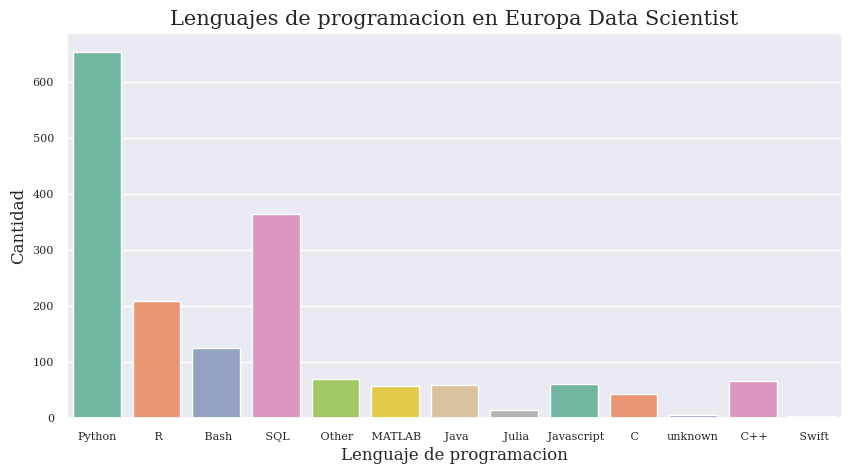

In [269]:
plt.figure()


#ordenado =df_explode_leng.sort_values("porcentaje", ascending=False)
fig = sns.countplot( x= 'lenguaje_lista', data=df_explode_leng_ds, palette='Set2')

sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title('Lenguajes de programacion en Europa Data Scientist',fontsize= 15, position=(0.5,6))
#plt.xticks(rotatio)

plt.xlabel("Lenguaje de programacion", fontsize = 8, font = "serif")
plt.ylabel("Cantidad", fontsize = 8, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.savefig('graficas/uso_lenguajes_europa_datascientist.png',bbox_inches='tight')

plt.show(); 

VAMOS A HACER LO MISMO CON NUBES PARA DATA SCIENTIST

In [270]:
df_nubes_ds= df_nubes[ df_nubes['puesto'].isin(['Data Scientist'])]

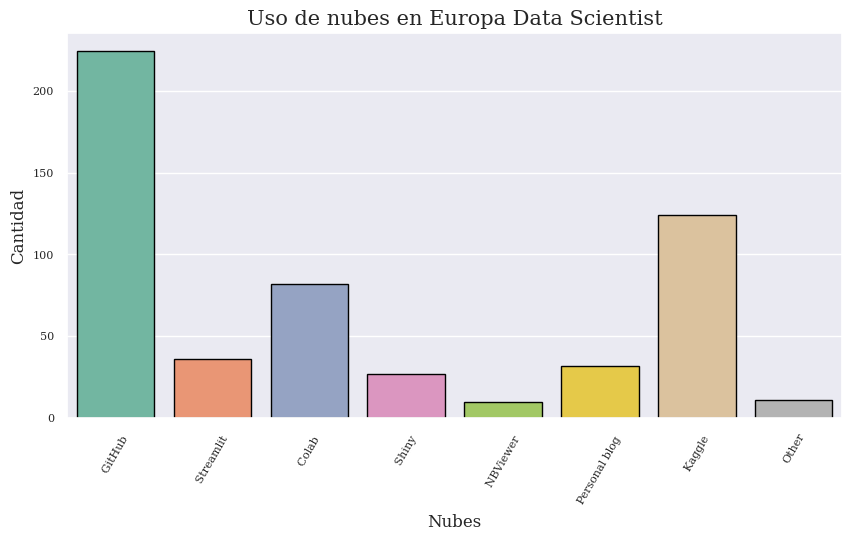

In [273]:
plt.figure()


#ordenado =df_explode_leng.sort_values("porcentaje", ascending=False)
fig = sns.countplot( x= 'lista_nubes', data = df_nubes_ds, edgecolor = 'black', palette='Set2')

sns.set_style("whitegrid")
sns.set(font = "serif")

plt.title('Uso de nubes en Europa Data Scientist',fontsize= 15, position=(0.5,6))
plt.xticks(rotation = 60)

plt.xlabel("Nubes", fontsize = 10, font = "serif")
plt.ylabel("Cantidad", fontsize = 10, font = "serif")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)



plt.savefig('graficas/uso_nubes_europa_datascientist.png',bbox_inches='tight')

plt.show();